In [1]:
import numpy as np 
import pandas as pd

import os
dir_black = os.path.join('./Black Soil')
dir_Cinder = os.path.join('./Cinder Soil')
dir_Laterite = os.path.join('./Laterite Soil')
dir_peat = os.path.join('./Peat Soil')
dir_yellow = os.path.join('./Yellow Soil')
        

This is folder based data or directory based and thus the images are in folders that are again in main folder. This creates a problem of accessing the image data which aren't augmented.<br>
The Keras has ImageDataGenerator class which generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). Basically, it can be used to augment image data with a lot of built-in pre-processing.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In this, the flow_from_directory method automatically scans through all the sub-directories and sources the images along with their appropriate labels.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        './', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [5]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [6]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [7]:
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [15]:
total_sample = train_generator.n
n_epochs = 30

In [16]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 6s 296ms/step - loss: 0.8448 - acc: 0.7123
Epoch 2/30
15/15 [==============================] - 5s 296ms/step - loss: 0.3669 - acc: 0.8836
Epoch 3/30
15/15 [==============================] - 5s 303ms/step - loss: 0.5234 - acc: 0.8151
Epoch 4/30
15/15 [==============================] - 5s 302ms/step - loss: 0.5156 - acc: 0.8014
Epoch 5/30
15/15 [==============================] - 5s 303ms/step - loss: 0.3728 - acc: 0.8425
Epoch 6/30
15/15 [==============================] - 5s 299ms/step - loss: 0.4484 - acc: 0.8630
Epoch 7/30
15/15 [==============================] - 4s 302ms/step - loss: 0.2331 - acc: 0.9110
Epoch 8/30
15/15 [==============================] - 4s 291ms/step - loss: 0.4146 - acc: 0.8767
Epoch 9/30
15/15 [==============================] - 4s 294ms/step - loss: 0.2960 - acc: 0.8904
Epoch 10/30
15/15 [==============================] - 4s 292ms/step - loss: 0.3130 - acc: 0.9041
Epoch 11/30
15/15 [==============================

In [17]:
import matplotlib.pyplot as plt

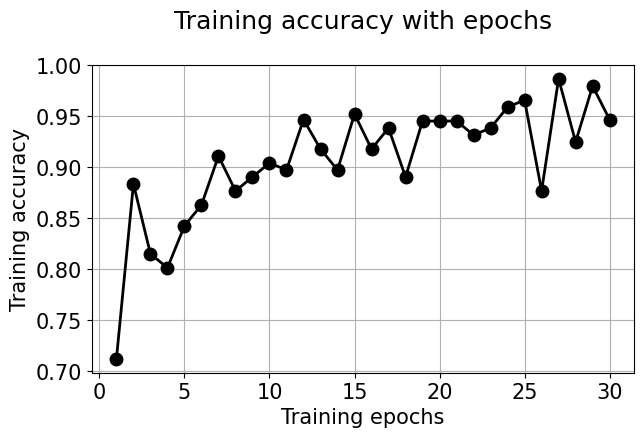

In [18]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Some ways to save the model...**

The saved model formats can be used to continue with the model preparation without actually starting from the beginning.<br>
The saved model files can be used to deploy the model in android or web applications.

In [19]:
model.save('my_model.h5')

In [53]:
model.save(filepath="./")

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


In [ ]:
from tensorflow.keras.models import Sequential
model.export(export_dir='.')

AttributeError: 'Sequential' object has no attribute 'export'

In [22]:
converter = tf.lite.TFLiteConverter.from_saved_model('./')
tflite_model = converter.convert()
open("soil.tflite", "wb").write(tflite_model)

922796

In [ ]:
model.save_weights("model.h5")

In [ ]:
#  tf.keras.models.save_model(model, filepath="save_model/save_model")